# Classification Estimator

Create a classifier using logistic regression. Create a model to predict which ***Funded*** feature would apply to new records going forward.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model._logistic import LogisticRegression

import numpy as np

# preprocess the data - create scaler...
# scale the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

### For my train_test_split, I used the following parameters:
```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)
```

### When I declared logistic regression classifier, I used the following parameters:

```
cls = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,  
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,  
                   multi_class='auto', n_jobs=None, penalty='l2',  
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,  
                   warm_start=False)


## Prepare Data
* Perform EDA
* Handle Missing Data (Remove or Impute)
* Identify Target Data
* Scale the Data
* Encode any Text Data (Categorical Data)

In [2]:
data = pd.read_csv('./data/kickstarter.csv')

In [3]:
data.head()

,Funded,URL,Title,Year,Month,Type,Has FB,Backed Projects,Previous Projects,Creator Desc Len,Title Len,Goal,Duration,Pledge Levels,Min Pledge Tiers,Max Pledge Tiers,Proj Desc Len,Images,Videos,Has Video
0,no,https://www.kickstarter.com/projects/mischaa/p...,Pixelstart: Choose Your Own Pixels (Canceled),2016,Apr,Art,1,11,2,125,57,2829.59,53,7,1.14,171.0,2001,2,1,1
1,no,https://www.kickstarter.com/projects/105587445...,Smart shop Icons (Canceled),2016,Apr,Art,1,0,0,111,27,28295.87,51,3,1.14,46.0,2508,0,0,0
2,no,https://www.kickstarter.com/projects/minimalpr...,Minimal Haus Prints: Digital Prints for DIY Wa...,2016,Apr,Art,0,4,0,294,52,766.25,30,8,1.51,755.0,2325,1,1,1
3,no,https://www.kickstarter.com/projects/797661619...,NeoN: Altering the Alternative (Canceled),2016,Mar,Art,0,0,0,179,41,1439.10,24,5,7.00,141.0,3736,13,1,1
4,no,https://www.kickstarter.com/projects/198369359...,Nintendo NES 8bit retro canvas (Canceled),2016,Mar,Art,0,0,0,51,41,1000.00,30,2,5.00,20.0,636,0,0,0


In [4]:
data.shape

(1163, 20)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Funded             1163 non-null   object 
 1   URL                1163 non-null   object 
 2   Title              1163 non-null   object 
 3   Year               1163 non-null   int64  
 4   Month              1163 non-null   object 
 5   Type               1163 non-null   object 
 6   Has FB             1163 non-null   int64  
 7   Backed Projects    1163 non-null   int64  
 8   Previous Projects  1163 non-null   int64  
 9   Creator Desc Len   1163 non-null   int64  
 10  Title Len          1163 non-null   int64  
 11  Goal               1163 non-null   float64
 12  Duration           1163 non-null   int64  
 13  Pledge Levels      1163 non-null   int64  
 14  Min Pledge Tiers   1163 non-null   float64
 15  Max Pledge Tiers   1163 non-null   float64
 16  Proj Desc Len      1163 

In [6]:
data['Funded'].value_counts(normalize=True)

Funded
no     0.588994
yes    0.411006
Name: proportion, dtype: float64

In [7]:
# sns.pairplot(df_train, hue='actual');

### Handle Missing Data

In [8]:
# no missing data in tjhis dataset

## Select the Target Data
* Create an array of the target data
* Select the features to be used for prediction
* Create a 2d array (or DF) of the selected features for the X Matrix

In [9]:
y = data['Funded']
y.head

<bound method NDFrame.head of 0       no
1       no
2       no
3       no
4       no
        ..
1158    no
1159    no
1160    no
1161    no
1162    no
Name: Funded, Length: 1163, dtype: object>

In [10]:
y.value_counts()

Funded
no     685
yes    478
Name: count, dtype: int64

In [11]:
X = data.drop(columns='Funded')

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   URL                1163 non-null   object 
 1   Title              1163 non-null   object 
 2   Year               1163 non-null   int64  
 3   Month              1163 non-null   object 
 4   Type               1163 non-null   object 
 5   Has FB             1163 non-null   int64  
 6   Backed Projects    1163 non-null   int64  
 7   Previous Projects  1163 non-null   int64  
 8   Creator Desc Len   1163 non-null   int64  
 9   Title Len          1163 non-null   int64  
 10  Goal               1163 non-null   float64
 11  Duration           1163 non-null   int64  
 12  Pledge Levels      1163 non-null   int64  
 13  Min Pledge Tiers   1163 non-null   float64
 14  Max Pledge Tiers   1163 non-null   float64
 15  Proj Desc Len      1163 non-null   int64  
 16  Images             1163 

In [12]:
X.head()

,URL,Title,Year,Month,Type,Has FB,Backed Projects,Previous Projects,Creator Desc Len,Title Len,Goal,Duration,Pledge Levels,Min Pledge Tiers,Max Pledge Tiers,Proj Desc Len,Images,Videos,Has Video
0,https://www.kickstarter.com/projects/mischaa/p...,Pixelstart: Choose Your Own Pixels (Canceled),2016,Apr,Art,1,11,2,125,57,2829.59,53,7,1.14,171.0,2001,2,1,1
1,https://www.kickstarter.com/projects/105587445...,Smart shop Icons (Canceled),2016,Apr,Art,1,0,0,111,27,28295.87,51,3,1.14,46.0,2508,0,0,0
2,https://www.kickstarter.com/projects/minimalpr...,Minimal Haus Prints: Digital Prints for DIY Wa...,2016,Apr,Art,0,4,0,294,52,766.25,30,8,1.51,755.0,2325,1,1,1
3,https://www.kickstarter.com/projects/797661619...,NeoN: Altering the Alternative (Canceled),2016,Mar,Art,0,0,0,179,41,1439.10,24,5,7.00,141.0,3736,13,1,1
4,https://www.kickstarter.com/projects/198369359...,Nintendo NES 8bit retro canvas (Canceled),2016,Mar,Art,0,0,0,51,41,1000.00,30,2,5.00,20.0,636,0,0,0


### Scale the Data

In [13]:
#prep data for scaling and encoding      ###we do it for linear regression as well###

X_tmp_text = X.select_dtypes(include = ['object'])
X_tmp_numeric = X.select_dtypes(exclude = ['object'])

In [14]:
# preprocess the data - create scaler...                      Everything comes out between 0 and 1
scaler = MinMaxScaler()
scaled_numeric = scaler.fit_transform(X_tmp_numeric)
scaled_numeric

array([[0.        , 1.        , 0.0316092 , ..., 0.02105263, 0.07692308,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01149425, ..., 0.01052632, 0.07692308,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00574713, ..., 0.        , 0.07692308,
        1.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
df_scaled_numeric = pd.DataFrame(scaled_numeric)
df_scaled_numeric.columns = X_tmp_numeric.columns
df_scaled_numeric

,Year,Has FB,Backed Projects,Previous Projects,Creator Desc Len,Title Len,Goal,Duration,Pledge Levels,Min Pledge Tiers,Max Pledge Tiers,Proj Desc Len,Images,Videos,Has Video
0,0.0,1.0,0.031609,0.068966,0.165125,0.691358,0.000282,0.844828,0.068182,0.000044,0.006810,0.068782,0.021053,0.076923,1.0
1,0.0,1.0,0.000000,0.000000,0.146631,0.320988,0.002829,0.810345,0.022727,0.000044,0.001810,0.086739,0.000000,0.000000,0.0
2,0.0,0.0,0.011494,0.000000,0.388375,0.629630,0.000076,0.448276,0.079545,0.000081,0.030171,0.080258,0.010526,0.076923,1.0
3,0.0,0.0,0.000000,0.000000,0.236460,0.493827,0.000143,0.344828,0.045455,0.000630,0.005610,0.130233,0.136842,0.076923,1.0
4,0.0,0.0,0.000000,0.000000,0.067371,0.493827,0.000099,0.448276,0.011364,0.000430,0.000770,0.020436,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,0.0,1.0,0.000000,0.000000,0.070013,0.098765,0.014390,0.448276,0.011364,0.001330,0.005690,0.015903,0.000000,0.000000,0.0
1159,0.0,0.0,0.002874,0.000000,0.663144,0.135802,0.000994,0.448276,0.045455,0.000430,0.071972,0.208932,0.031579,0.076923,1.0
1160,0.0,0.0,0.000000,0.000000,0.648613,0.456790,0.001999,0.448276,0.011364,0.001430,0.000970,0.039173,0.000000,0.000000,0.0
1161,0.0,0.0,0.005747,0.000000,0.677675,0.333333,0.000382,0.965517,0.011364,0.000001,0.028290,0.028087,0.000000,0.076923,1.0


In [16]:
df_X = pd.DataFrame(df_scaled_numeric)
df_X

,Year,Has FB,Backed Projects,Previous Projects,Creator Desc Len,Title Len,Goal,Duration,Pledge Levels,Min Pledge Tiers,Max Pledge Tiers,Proj Desc Len,Images,Videos,Has Video
0,0.0,1.0,0.031609,0.068966,0.165125,0.691358,0.000282,0.844828,0.068182,0.000044,0.006810,0.068782,0.021053,0.076923,1.0
1,0.0,1.0,0.000000,0.000000,0.146631,0.320988,0.002829,0.810345,0.022727,0.000044,0.001810,0.086739,0.000000,0.000000,0.0
2,0.0,0.0,0.011494,0.000000,0.388375,0.629630,0.000076,0.448276,0.079545,0.000081,0.030171,0.080258,0.010526,0.076923,1.0
3,0.0,0.0,0.000000,0.000000,0.236460,0.493827,0.000143,0.344828,0.045455,0.000630,0.005610,0.130233,0.136842,0.076923,1.0
4,0.0,0.0,0.000000,0.000000,0.067371,0.493827,0.000099,0.448276,0.011364,0.000430,0.000770,0.020436,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,0.0,1.0,0.000000,0.000000,0.070013,0.098765,0.014390,0.448276,0.011364,0.001330,0.005690,0.015903,0.000000,0.000000,0.0
1159,0.0,0.0,0.002874,0.000000,0.663144,0.135802,0.000994,0.448276,0.045455,0.000430,0.071972,0.208932,0.031579,0.076923,1.0
1160,0.0,0.0,0.000000,0.000000,0.648613,0.456790,0.001999,0.448276,0.011364,0.001430,0.000970,0.039173,0.000000,0.000000,0.0
1161,0.0,0.0,0.005747,0.000000,0.677675,0.333333,0.000382,0.965517,0.011364,0.000001,0.028290,0.028087,0.000000,0.076923,1.0


In [17]:
df_X.shape

(1163, 15)

### Encode the Data

In [18]:
#encode any text features that will be features (you do not encode Target / label/ y)
df_scaled_text = pd.get_dummies(X_tmp_text, drop_first=True)     # dummies are ONE HOT ENCODING, specific variables

In [19]:
#df_scaled_text = df_text['income']
#df_text.drop(['income'], axis=1, inplace=True)



In [20]:
df_final = pd.concat([df_scaled_text, df_scaled_numeric], axis=1)    #this is waht statistical algorithm wants to see in machine learning:
df_final           

,URL_https://www.kickstarter.com/projects/1002686019/muros,URL_https://www.kickstarter.com/projects/1005151588/my-first-horror-alphabet-book,URL_https://www.kickstarter.com/projects/1005151588/the-little-abc-book-of-horror,URL_https://www.kickstarter.com/projects/1007968674/artistic-collaboration-2016,URL_https://www.kickstarter.com/projects/1008856355/crafts-and-jewelry-etsy-shop-start-up-by-jessilynn,URL_https://www.kickstarter.com/projects/1009586486/slemish-woodcrafts,URL_https://www.kickstarter.com/projects/1013189283/quicktask,URL_https://www.kickstarter.com/projects/1013222245/serum-a-short-film,URL_https://www.kickstarter.com/projects/1015397918/cybersecurity-for-small-businesses,URL_https://www.kickstarter.com/projects/1015943517/i-want-to-start-a-dating-application-with-videos,...,Title Len,Goal,Duration,Pledge Levels,Min Pledge Tiers,Max Pledge Tiers,Proj Desc Len,Images,Videos,Has Video
0,False,False,False,False,False,False,False,False,False,False,...,0.691358,0.000282,0.844828,0.068182,0.000044,0.006810,0.068782,0.021053,0.076923,1.0
1,False,False,False,False,False,False,False,False,False,False,...,0.320988,0.002829,0.810345,0.022727,0.000044,0.001810,0.086739,0.000000,0.000000,0.0
2,False,False,False,False,False,False,False,False,False,False,...,0.629630,0.000076,0.448276,0.079545,0.000081,0.030171,0.080258,0.010526,0.076923,1.0
3,False,False,False,False,False,False,False,False,False,False,...,0.493827,0.000143,0.344828,0.045455,0.000630,0.005610,0.130233,0.136842,0.076923,1.0
4,False,False,False,False,False,False,False,False,False,False,...,0.493827,0.000099,0.448276,0.011364,0.000430,0.000770,0.020436,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,False,False,False,False,False,False,False,False,False,False,...,0.098765,0.014390,0.448276,0.011364,0.001330,0.005690,0.015903,0.000000,0.000000,0.0
1159,False,False,False,False,False,False,False,False,False,False,...,0.135802,0.000994,0.448276,0.045455,0.000430,0.071972,0.208932,0.031579,0.076923,1.0
1160,False,False,False,False,False,False,False,False,False,False,...,0.456790,0.001999,0.448276,0.011364,0.001430,0.000970,0.039173,0.000000,0.000000,0.0
1161,False,False,False,False,False,False,False,False,False,False,...,0.333333,0.000382,0.965517,0.011364,0.000001,0.028290,0.028087,0.000000,0.076923,1.0


## Select the Target Data
* Create an array of the target data
* Select the features to be used for prediction
* Create a 2d array (or DF) of the selected features for the X Matrix

In [21]:
y.value_counts(normalize=True)

Funded
no     0.588994
yes    0.411006
Name: proportion, dtype: float64

In [22]:
X = df_final
X.head()

,URL_https://www.kickstarter.com/projects/1002686019/muros,URL_https://www.kickstarter.com/projects/1005151588/my-first-horror-alphabet-book,URL_https://www.kickstarter.com/projects/1005151588/the-little-abc-book-of-horror,URL_https://www.kickstarter.com/projects/1007968674/artistic-collaboration-2016,URL_https://www.kickstarter.com/projects/1008856355/crafts-and-jewelry-etsy-shop-start-up-by-jessilynn,URL_https://www.kickstarter.com/projects/1009586486/slemish-woodcrafts,URL_https://www.kickstarter.com/projects/1013189283/quicktask,URL_https://www.kickstarter.com/projects/1013222245/serum-a-short-film,URL_https://www.kickstarter.com/projects/1015397918/cybersecurity-for-small-businesses,URL_https://www.kickstarter.com/projects/1015943517/i-want-to-start-a-dating-application-with-videos,...,Title Len,Goal,Duration,Pledge Levels,Min Pledge Tiers,Max Pledge Tiers,Proj Desc Len,Images,Videos,Has Video
0,False,False,False,False,False,False,False,False,False,False,...,0.691358,0.000282,0.844828,0.068182,0.000044,0.006810,0.068782,0.021053,0.076923,1.0
1,False,False,False,False,False,False,False,False,False,False,...,0.320988,0.002829,0.810345,0.022727,0.000044,0.001810,0.086739,0.000000,0.000000,0.0
2,False,False,False,False,False,False,False,False,False,False,...,0.629630,0.000076,0.448276,0.079545,0.000081,0.030171,0.080258,0.010526,0.076923,1.0
3,False,False,False,False,False,False,False,False,False,False,...,0.493827,0.000143,0.344828,0.045455,0.000630,0.005610,0.130233,0.136842,0.076923,1.0
4,False,False,False,False,False,False,False,False,False,False,...,0.493827,0.000099,0.448276,0.011364,0.000430,0.000770,0.020436,0.000000,0.000000,0.0


## Prepare the Model

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [24]:
X_train[0:5]

,URL_https://www.kickstarter.com/projects/1002686019/muros,URL_https://www.kickstarter.com/projects/1005151588/my-first-horror-alphabet-book,URL_https://www.kickstarter.com/projects/1005151588/the-little-abc-book-of-horror,URL_https://www.kickstarter.com/projects/1007968674/artistic-collaboration-2016,URL_https://www.kickstarter.com/projects/1008856355/crafts-and-jewelry-etsy-shop-start-up-by-jessilynn,URL_https://www.kickstarter.com/projects/1009586486/slemish-woodcrafts,URL_https://www.kickstarter.com/projects/1013189283/quicktask,URL_https://www.kickstarter.com/projects/1013222245/serum-a-short-film,URL_https://www.kickstarter.com/projects/1015397918/cybersecurity-for-small-businesses,URL_https://www.kickstarter.com/projects/1015943517/i-want-to-start-a-dating-application-with-videos,...,Title Len,Goal,Duration,Pledge Levels,Min Pledge Tiers,Max Pledge Tiers,Proj Desc Len,Images,Videos,Has Video
290,False,False,False,False,False,True,False,False,False,False,...,0.333333,0.000107,0.448276,0.034091,0.000630,0.002810,0.059503,0.000000,0.076923,1.0
902,False,False,False,False,False,False,False,False,False,False,...,0.765432,0.003677,0.706897,0.181818,0.000930,0.397982,0.177800,0.063158,0.076923,1.0
543,False,False,False,False,False,False,False,False,False,False,...,0.555556,0.001532,0.448276,0.181818,0.000730,0.195976,0.433484,0.105263,0.076923,1.0
984,False,False,False,False,False,False,False,False,False,False,...,0.716049,0.004316,0.448276,0.068182,0.000073,0.286498,0.176348,0.189474,0.230769,1.0
1106,False,False,False,False,False,False,False,False,False,False,...,0.506173,0.003830,0.448276,0.000000,0.000730,0.000290,0.143161,0.000000,0.000000,0.0


In [25]:
X_test.head()

,URL_https://www.kickstarter.com/projects/1002686019/muros,URL_https://www.kickstarter.com/projects/1005151588/my-first-horror-alphabet-book,URL_https://www.kickstarter.com/projects/1005151588/the-little-abc-book-of-horror,URL_https://www.kickstarter.com/projects/1007968674/artistic-collaboration-2016,URL_https://www.kickstarter.com/projects/1008856355/crafts-and-jewelry-etsy-shop-start-up-by-jessilynn,URL_https://www.kickstarter.com/projects/1009586486/slemish-woodcrafts,URL_https://www.kickstarter.com/projects/1013189283/quicktask,URL_https://www.kickstarter.com/projects/1013222245/serum-a-short-film,URL_https://www.kickstarter.com/projects/1015397918/cybersecurity-for-small-businesses,URL_https://www.kickstarter.com/projects/1015943517/i-want-to-start-a-dating-application-with-videos,...,Title Len,Goal,Duration,Pledge Levels,Min Pledge Tiers,Max Pledge Tiers,Proj Desc Len,Images,Videos,Has Video
942,False,False,False,False,False,False,False,False,False,False,...,0.617284,0.001199,0.448276,0.113636,0.000430,0.199976,0.386343,0.136842,0.076923,1.0
101,False,False,False,False,False,False,False,False,False,False,...,0.518519,0.001187,0.275862,0.034091,0.028132,0.315899,0.049302,0.105263,0.000000,0.0
772,False,False,False,False,False,False,False,False,False,False,...,0.098765,0.002499,0.965517,0.056818,0.000030,0.079972,0.052525,0.000000,0.076923,1.0
670,False,False,False,False,False,False,False,False,False,False,...,0.481481,0.000999,0.482759,0.045455,0.000030,0.039971,0.127258,0.000000,0.076923,1.0
881,False,False,False,False,False,False,False,False,False,False,...,0.086420,0.004999,0.448276,0.034091,0.002430,0.023970,0.107672,0.063158,0.000000,0.0


In [26]:
y_train.head()

290      no
902      no
543     yes
984      no
1106     no
Name: Funded, dtype: object

In [27]:
y_test.head()

942    yes
101     no
772     no
670    yes
881     no
Name: Funded, dtype: object

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((930, 2348), (233, 2348), (930,), (233,))

## Create the Model

In [29]:
cls = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,  
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,  
                   multi_class='auto', n_jobs=None, penalty='l2',  
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,  
                   warm_start=False)

In [30]:
cls.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [31]:
cls_train = cls.predict(X_train)

In [32]:
cls.score(X_train, y_train)

0.9172043010752688

In [33]:
accuracy_score(y_train, cls_train)

0.9172043010752688

In [34]:
cls_test = cls.predict(X_test)

In [35]:
#cls_test

In [36]:
y_test

942    yes
101     no
772     no
670    yes
881     no
      ... 
908     no
136     no
54      no
966     no
351    yes
Name: Funded, Length: 233, dtype: object

In [37]:
cls.score(X_test, y_test)

0.8454935622317596

In [38]:
from sklearn.metrics import confusion_matrix
cls_cm_train = confusion_matrix(cls_train, y_train)
cls_cm_train

array([[524,  48],
       [ 29, 329]], dtype=int64)

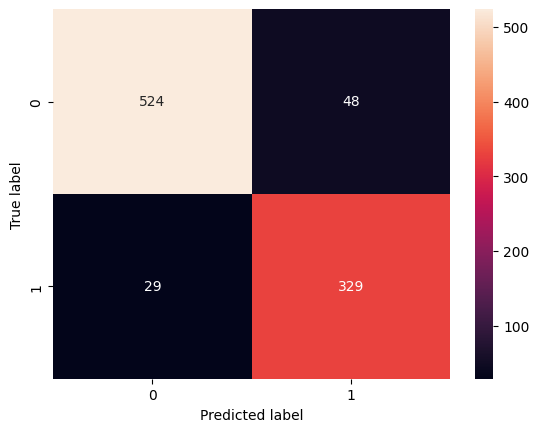

In [39]:
sns.heatmap(cls_cm_train, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [40]:
from sklearn.metrics import confusion_matrix
cls_cm_test = confusion_matrix(cls_test, y_test)
cls_cm_test

array([[118,  22],
       [ 14,  79]], dtype=int64)

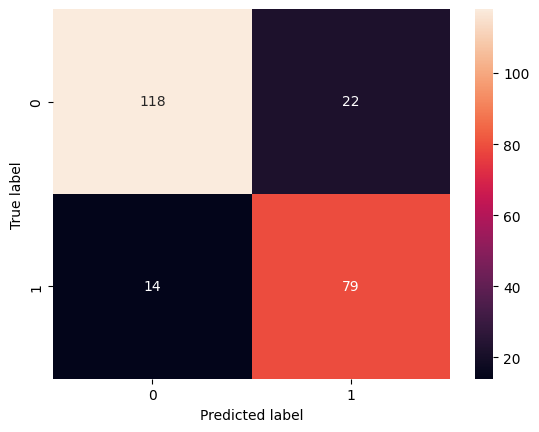

In [41]:
sns.heatmap(cls_cm_test, annot=True, fmt='d')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()